In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import cm, ticker
from numpy import ma

In [179]:
unit = 1E-10
eps = 1E-3 * unit
delta = 0.01 * unit

xx = [0.2, 0.7, 0.8, 0.8, 0.7, 0.85, 0.75, 0.75, 0.65, 0.3, 0.4]
yy = [0.2, 0.7, 0.8, 0.7, 0.8, 0.75, 0.75, 0.65, 0.65, 0.3, 0.4]
qq = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ,1]

x = np.arange(0, unit, delta)
y = np.arange(0, unit, delta)
X, Y = np.meshgrid(x, y)

def function(X, Y):
    Z = np.full_like(X, 0)
    for i, r in enumerate(zip(X, Y)):
        for j, s in enumerate(zip(r[0], r[1])):
            zz = 0
            for xi, yi, qi in zip(xx, yy, qq):
                xxi = xi * unit
                yyi = yi * unit
                r2 =(s[0] - xxi + eps)**2 + (s[1] - yyi + eps)**2
                if r2 > 1E-3 * unit**2:
                    z = 1 / r2
                else:
                    z = r2
                zz += z 
            Z[i, j] = zz
    return Z

Z = function(X, Y)

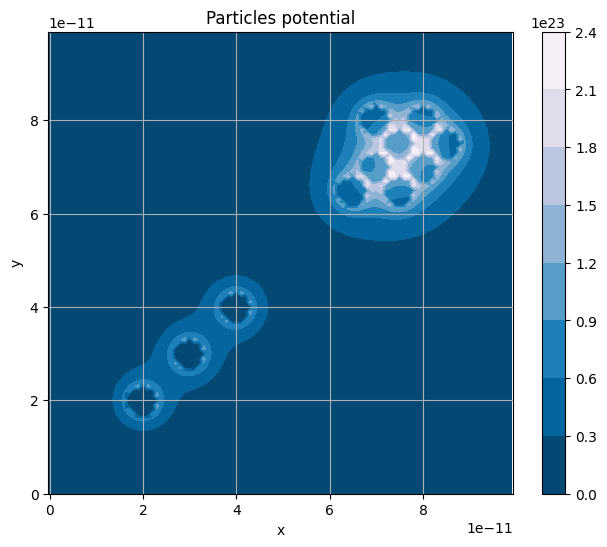

In [181]:
fig, ax = plt.subplots(figsize=(7.5, 6))
ax.set_xlim(0, unit)
ax.set_ylim(0, unit)

#cs = ax.contourf(X, Y, Z, locator=ticker.AsinhLocator(1), cmap=cm.PuBu_r)
#cs = ax.contourf(X, Y, Z, locator=ticker.LogLocator(), cmap=cm.PuBu_r)
cs = ax.contourf(X, Y, Z, cmap=cm.PuBu_r)
cbar = fig.colorbar(cs)

ax.grid()
ax.set_title('Particles potential')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.axis('equal')
plt.show()

## todo (25-jul-2024)
- Find short range potential.
- Droplet surface acts like a potential shell.
- Use ABM if necessary to create such potential.
- Inside the droplet, all nucleon particles behave like gas.